In [14]:
##Linear regression 

In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [200]:
# Generating our data.

X = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
Y = np.sin(X) + 0.1 * np.power(X, 2) + 0.5 * np.random.randn(100, 1)
X /= np.max(X)


X = np.hstack((np.ones_like(X), X))

In [283]:
class LinearRegression():
    
    def __init__(self, lr, num_iter, weights, X, y):
        self.lr=lr
        self.num_iter=num_iter
        self.weights=weights
        self.X=X
        self.y=y
        
        
    def gradient(self):
        #m=len(self.y)
        h=np.dot(self.X , self.weights)
        error=h - self.y
        cost_function= np.sum(error**2) / 2
        grad= np.dot(self.X.T , error)
        return  grad, cost_function
    
    
    def fit(self):
        loss=np.zeros((self.num_iter,1))
        for i in range(self.num_iter):
            self.weights=self.weights - self.lr*self.gradient()[0]
            loss[i]=self.gradient()[1]
        return self.weights, loss    

In [284]:
order = np.random.permutation(len(X))
portion=20
X_train = X[order[portion:]]
Y_train = Y[order[portion:]]

X_test= X[order[:portion]]
Y_test= Y[order[:portion]]

In [285]:
(X_train.shape[1],1)

(2, 1)

In [286]:
LinearRegression(0.0001,10000,weights,X_train,Y_train).gradient()

(array([[-300.07062887],
        [-220.85384329]]), 918.2007108566927)

In [287]:
weights=np.zeros((X_train.shape[1],1))

In [288]:
model=LinearRegression(0.0001,10000,weights,X_train,Y_train).fit()

In [289]:
t=model[1]
x=np.arange(len(t))

In [290]:
x=x.reshape(-1,1)

In [291]:
t.shape

(10000, 1)

In [292]:
x.shape

(10000, 1)

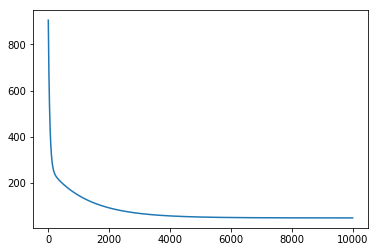

In [293]:
plt.plot(x,t)

In [294]:
model_test=LinearRegression(0.01,100000,model[0],X_test,Y_test).fit()

In [295]:
model_test[1]

array([[14.9659327 ],
       [14.87538645],
       [14.82457515],
       ...,
       [14.56456705],
       [14.56456705],
       [14.56456705]])

In [296]:
t1=model_test[1]
x1=np.arange(len(t1))

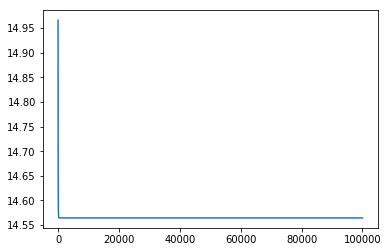

In [297]:
plt.plot(x1,t1)

In [340]:
data_n=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [341]:
data_n

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [304]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
##Logistic Regression

In [309]:
from sklearn import datasets

In [315]:
data=datasets.load_iris()
x=data.data[:,:2]
y=(data.target!=0)*1

In [318]:
class LogisticRegression:
    
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [321]:
model = LogisticRegression(lr=0.1, num_iter=300000)
%time model.fit(x, y)

CPU times: user 3.06 s, sys: 9 ms, total: 3.07 s
Wall time: 3.06 s


In [332]:
def churn_convert(data_n):
    for i in range(len('Churn')):
        if data_n['Churn'][i]=='Yes':
            data_n['Churn'][i]=1
        elif data_n['Churn'][i]=='No':
            data_['Churn'][i]=1
    return data_n        

In [346]:
data_n['Churn']=data_n['Churn'].apply(lambda x: 0 if x=='No' else 1)

In [ ]:
#data_['pred']=data_n['predic'].apply(lambda x: 0 if x<=0.5 else 1)

In [347]:
y=data_n['Churn'].copy()
x=data_n[['tenure','MonthlyCharges']].copy()

In [348]:
y=pd.DataFrame(y)

In [349]:
x=x.values
y=y.values

In [357]:
preds_n = model.predict(x, 0.5)
# accuracy
(preds_n == y).mean()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


0.14184296464574755

In [360]:
model.predict(x, 0.5)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


array([False, False, False, ..., False, False, False])